In [14]:
import numpy as np
import pandas as pd

log_and_robust_scaled_df = pd.read_csv("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/log_and_robust_scaled_df.csv", index_col=0)
log_and_robust_scaled_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,-2.521585,0.970048,-3.841831,-0.394344,4.750394,0.848371,0.935792,-1.533522
서울특별시 광진구 광장동 104,-2.521585,0.970048,-3.841831,-1.301622,0.100054,0.128199,0.968199,-1.533522
서울특별시 광진구 광장동 105,-2.521585,0.970048,-3.841831,-3.291337,3.006187,0.196280,0.818840,-1.533522
서울특별시 광진구 광장동 106,-2.521585,0.970048,-3.841831,-1.044650,1.861811,0.128199,0.770367,-1.533522
서울특별시 광진구 광장동 107,-2.521585,0.970048,-3.841831,-0.414593,1.653681,0.555555,0.725527,-1.488403
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,0.539291,-0.081046,0.386382,-0.545304,-0.126127,-0.403988,-0.079144,-0.402768
서울특별시 광진구 화양동 96-2,0.539291,-0.081046,0.549455,-0.374489,0.023327,-0.403988,-0.079144,-0.402768
서울특별시 광진구 화양동 97,0.539291,-0.081046,0.386382,-0.335899,0.260984,0.126888,-0.071062,-0.427901


## log변환 - 로버스트 스케일링 - umap (manhattan) - HDBSCAN

In [15]:
### UMAP 차원축소
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0, 
    n_components=2,
    random_state=42,
    metric = 'manhattan' # 군집 개수 늘리는 방식
    # 'euclidean' (기본), 'manhattan', 'cosine', 'correlation' 중 하나 선택
)

"""
n_neighbors : 작을수록 지역적 구조가 강조됨
min_dist: 포인트 간의 거리 지정하기
n_neighbors=n_neighbors, # 5~ 50 기본값 15
min_dist=min_dist, # 0.001~ 0.5 기본값 0.1
"""

# UMAP 적용
train_df_umap = umap_reducer.fit_transform(log_and_robust_scaled_df)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=log_and_robust_scaled_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,-1.541466,12.050376
서울특별시 광진구 광장동 104,-1.663694,12.070420
서울특별시 광진구 광장동 105,-1.653530,12.051132
서울특별시 광진구 광장동 106,-1.655412,12.049907
서울특별시 광진구 광장동 107,-1.638430,12.039934
...,...,...
서울특별시 광진구 화양동 95-5,2.848385,-0.094824
서울특별시 광진구 화양동 96-2,2.715327,-0.176988
서울특별시 광진구 화양동 97,2.783718,0.013623


In [16]:
# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_hdbscan(train_df_umap) :
    from hdbscan import HDBSCAN

    # HDBSCAN 객체 생성 및 매개 변수 설정 (min_cluster_size 등)
    hdbscan_clustering = HDBSCAN()

    # UMAP으로 축소된 데이터(train_df_umap)에 HDBSCAN 적용
    hdbscan_clustering.fit(train_df_umap)

    # 모델 저장
    import pickle

    with open("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/LogAndRobustScaled_UMAP_HDBSCAN_manhattan.pkl", "wb") as file:
        pickle.dump(hdbscan_clustering, file)


    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['HDBSCAN_cluster_without_noise'] = hdbscan_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['HDBSCAN_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_hdbscan = get_without_noise_hdbscan(train_df_umap)
get_without_noise_hdbscan

,UMAP1,UMAP2,HDBSCAN_cluster_without_noise
지번주소,,,
서울특별시 광진구 광장동 105,-1.653530,12.051132,77
서울특별시 광진구 광장동 106,-1.655412,12.049907,77
서울특별시 광진구 광장동 107,-1.638430,12.039934,77
서울특별시 광진구 광장동 108,-0.776712,12.278508,33
서울특별시 광진구 광장동 110,-0.791116,12.263251,33
...,...,...,...
서울특별시 광진구 화양동 94-82,-1.390074,4.648668,535
서울특별시 광진구 화양동 94-9,-1.382601,4.650796,535
서울특별시 광진구 화양동 95-3,2.870096,-0.098210,796


In [17]:
get_without_noise_hdbscan.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/HDBSCAN_cluster_without_noise_manhattan.csv')

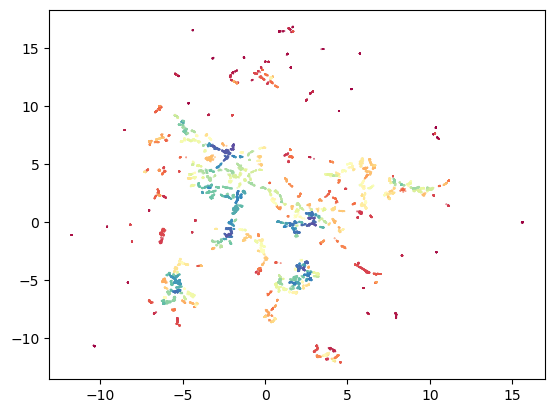

In [18]:
# 군집화 결과 시각화
def visualization_data(clustering_result):
    import matplotlib.pyplot as plt
    # 노이즈 포인트 제외
    clustered = (clustering_result['HDBSCAN_cluster_without_noise'] >= 0)
    
    plt.scatter(clustering_result[clustered]['UMAP1'],
                clustering_result[clustered]['UMAP2'],
                c=clustering_result[clustered]['HDBSCAN_cluster_without_noise'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
get_without_noise_hdbscan_v = visualization_data(get_without_noise_hdbscan)
get_without_noise_hdbscan_v

In [20]:
# 실루엣 점수 계산 함수
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result.loc[clustering_result['HDBSCAN_cluster_without_noise'] != -1, ['UMAP1', 'UMAP2']]
    labels = clustering_result.loc[clustering_result['HDBSCAN_cluster_without_noise'] != -1, 'HDBSCAN_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['HDBSCAN_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['HDBSCAN_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_hdbscan)
dunn_score = dunn(get_without_noise_hdbscan)
ch_score = calinski_harabasz(get_without_noise_hdbscan)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.6764299273490906
Dunn score: 0.0028
Calinski-Harabasz score: 314404.1453


<hr>

## log변환 - 로버스트 스케일링 - umap (cosine) - HDBSCAN

In [21]:
log_and_robust_scaled_df = pd.read_csv("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/log_and_robust_scaled_df.csv", index_col=0)

In [22]:
### UMAP 차원축소
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0, 
    n_components=2,
    random_state=42,
    metric = 'cosine' # 군집 개수 늘리는 방식
    # 'euclidean' (기본), 'manhattan', 'cosine', 'correlation' 중 하나 선택
)

# UMAP 적용
train_df_umap = umap_reducer.fit_transform(log_and_robust_scaled_df)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=log_and_robust_scaled_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,2.981006,-0.592480
서울특별시 광진구 광장동 104,2.835254,-0.903824
서울특별시 광진구 광장동 105,2.850076,-0.660670
서울특별시 광진구 광장동 106,2.839489,-0.781515
서울특별시 광진구 광장동 107,2.828220,-0.775777
...,...,...
서울특별시 광진구 화양동 95-5,10.352252,-3.150631
서울특별시 광진구 화양동 96-2,10.280642,-3.148048
서울특별시 광진구 화양동 97,9.952978,-2.993160


In [25]:
# HDBSCAN

# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_hdbscan(train_df_umap) :
    from hdbscan import HDBSCAN

    # HDBSCAN 객체 생성 및 매개 변수 설정 (min_cluster_size 등)
    hdbscan_clustering = HDBSCAN()

    # UMAP으로 축소된 데이터(train_df_umap)에 HDBSCAN 적용
    hdbscan_clustering.fit(train_df_umap)

    # 모델 저장
    import pickle

    with open("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/LogAndRobustScaled_UMAP_HDBSCAN_cosine.pkl", "wb") as file:
        pickle.dump(hdbscan_clustering, file)


    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['HDBSCAN_cluster_without_noise'] = hdbscan_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['HDBSCAN_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_hdbscan2 = get_without_noise_hdbscan(train_df_umap)
get_without_noise_hdbscan2

# 결과 저장
get_without_noise_hdbscan2.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/HDBSCAN_cluster_without_noise_cosine.csv')

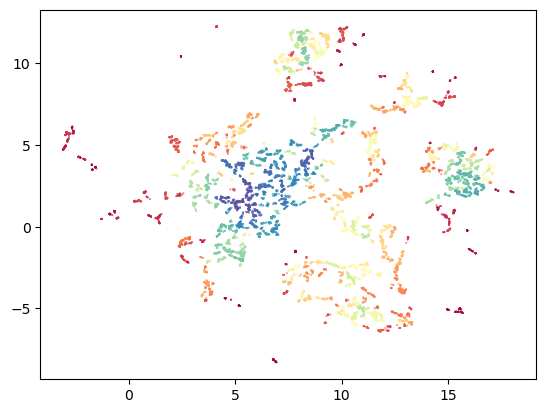

In [26]:
# 시각화
get_without_noise_hdbscan_v2 = visualization_data(get_without_noise_hdbscan2)
get_without_noise_hdbscan_v2

In [27]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_hdbscan2)
dunn_score = dunn(get_without_noise_hdbscan2)
ch_score = calinski_harabasz(get_without_noise_hdbscan2)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.6254945397377014
Dunn score: 0.0030
Calinski-Harabasz score: 165929.3570


<hr>

## log변환 - 로버스트 스케일링 - umap (correlation) - HDBSCAN

In [29]:
log_and_robust_scaled_df = pd.read_csv("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/log_and_robust_scaled_df.csv", index_col=0)

In [30]:
### UMAP 차원축소
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0, 
    n_components=2,
    random_state=42,
    metric = 'correlation' # 군집 개수 늘리는 방식
    # 'euclidean' (기본), 'manhattan', 'cosine', 'correlation' 중 하나 선택
)

# UMAP 적용
train_df_umap = umap_reducer.fit_transform(log_and_robust_scaled_df)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=log_and_robust_scaled_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,7.069666,7.525712
서울특별시 광진구 광장동 104,5.477084,9.608908
서울특별시 광진구 광장동 105,5.204193,9.341188
서울특별시 광진구 광장동 106,7.037618,7.847633
서울특별시 광진구 광장동 107,7.150563,7.880716
...,...,...
서울특별시 광진구 화양동 95-5,3.590543,0.123660
서울특별시 광진구 화양동 96-2,3.642701,-0.052629
서울특별시 광진구 화양동 97,3.199110,0.030934


In [31]:
# HDBSCAN

# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_hdbscan(train_df_umap) :
    from hdbscan import HDBSCAN

    # HDBSCAN 객체 생성 및 매개 변수 설정 (min_cluster_size 등)
    hdbscan_clustering = HDBSCAN()

    # UMAP으로 축소된 데이터(train_df_umap)에 HDBSCAN 적용
    hdbscan_clustering.fit(train_df_umap)

    # 모델 저장
    import pickle

    with open("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/LogAndRobustScaled_UMAP_HDBSCAN_correlation.pkl", "wb") as file:
        pickle.dump(hdbscan_clustering, file)


    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['HDBSCAN_cluster_without_noise'] = hdbscan_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['HDBSCAN_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_hdbscan3 = get_without_noise_hdbscan(train_df_umap)
get_without_noise_hdbscan3

# 결과 저장
get_without_noise_hdbscan3.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/3.LogAndRobustScaled_UMAP_Clustering_Tuning/HDBSCAN_cluster_without_noise_correlation.csv')

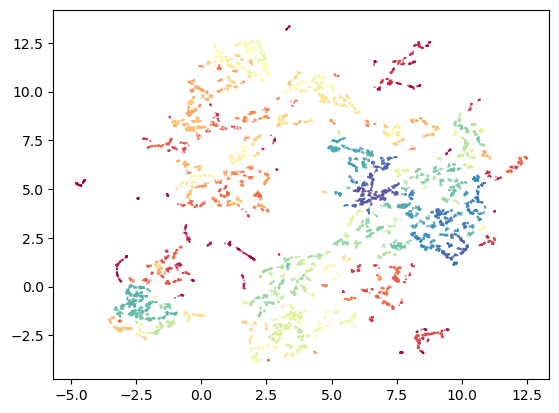

In [32]:
# 시각화
get_without_noise_hdbscan_v3 = visualization_data(get_without_noise_hdbscan3)
get_without_noise_hdbscan_v3

In [33]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_hdbscan3)
dunn_score = dunn(get_without_noise_hdbscan3)
ch_score = calinski_harabasz(get_without_noise_hdbscan3)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.6308992505073547
Dunn score: 0.0096
Calinski-Harabasz score: 147207.7398


euclidean (기본값): 유클리디안 거리는 많은 경우에서 잘 작동하는 메트릭

manhattan: 맨해튼 거리는 특히 희소한 데이터에 적합 + 유클리디안 거리보다 더 강한 군집화 효과를 원할 때 사용

cosine: 코사인 유사도는 벡터 간의 각도를 측정하므로, 데이터의 크기보다는 방향에 더 관심을 둠 + 텍스트 데이터나 고차원 데이터에 적합한 메트릭

correlation: 상관계수 기반 거리 메트릭은 벡터 간의 상관 관계를 측정 + 코사인 유사도와 비슷하게 방향에 더 집중하지만, 벡터의 중심을 0으로 맞춰서 계산함